<a href="https://colab.research.google.com/github/diegofloriano/AnaliseDeDados/blob/main/MachineLearning_Base02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Base 02: Sono e Estilo de Vida

Repositório bases de dados: https://drive.google.com/drive/folders/1fiBqX4Smv6GX2BFviHNFRM0eSwDi7ydf


# Contexto Empresarial:

Base fictícia composta por dados sobre hábitos de sono, saúde e estilo de vida de 400 indivíduos. Pode ser
usada para explorar a relação entre qualidade de vida e distúrbios do sono.


# Dicionário de Atributos (Traduzido)


| Atributo                             | Descrição                                                  |
|----------------------------------|-------------------------------------------------------------|
| Person ID                        | Identificador do indivíduo.                                |
| Gender                           | Gênero (Masculino/Feminino).                               |
| Age                              | Idade em anos.                                              |
| Occupation                       | Profissão.                                                  |
| Sleep Duration (hours)           | Horas de sono por dia.                                     |
| Quality of Sleep (scale: 1-10)   | Qualidade do sono (escala de 1 a 10).                      |
| Physical Activity Level (min/day)| Atividade física diária (minutos por dia).                 |
| Stress Level (scale: 1-10)       | Nível de estresse (escala de 1 a 10).                      |
| BMI Category                     | Categoria de IMC.                                          |
| Blood Pressure (systolic/diastolic) | Pressão arterial (sistólica/diastólica).               |
| Heart Rate (bpm)                 | Frequência cardíaca (batimentos por minuto).               |
| Daily Steps                      | Passos por dia.                                            |
| Sleep Disorder                   | Distúrbio do sono (Nenhum, Insônia, Apneia do Sono).      |


# Sistema de Regressão:
*  Frequência Cardíaca (Heart Rate): Prever a frequência cardíaca de um indivíduo pode ser útil para entender como o estilo de vida afeta a saúde cardiovascular. As variáveis preditoras incluem: idade, nível de atividade física, nível de estresse, duração e qualidade do sono. Se classifica como Regressão, pois é previsto com valores numéricos.

# Sistema de Classificação:
*  Categoria de IMC (BMI Category): Prever a categoria de IMC (por exemplo, "Normal", "Sobrepeso", "Obeso") de um indivíduo. As variáveis preditoras incluem: idade, sexo, ocupação, nível de atividade física, nível de estresse, duração e qualidade do sono, frequência cardíaca e passos diários. Se classifica como Classificação, poir é previsto com variáveis categóricas.





In [1]:
# importar os pacotes necessarios
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score,
    recall_score, f1_score, confusion_matrix
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

path = "/content/drive/MyDrive/Trabalho1"

Mounted at /content/drive


In [3]:
df = pd.read_csv(path + '/02_sono_estilo_vida.csv', sep=',')

# Análise dos Dados

# Qual a porcentagem de valores ausentes no dataset?

In [4]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes

print(f'As variáveis com mais dados faltantes, em porcentagem (%), são:\n')
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)

As variáveis com mais dados faltantes, em porcentagem (%), são:



,0
Sleep Disorder,58.55615
Gender,0.00000
Age,0.00000
Occupation,0.00000
Person ID,0.00000
Sleep Duration,0.00000
Quality of Sleep,0.00000
Stress Level,0.00000
Physical Activity Level,0.00000
BMI Category,0.00000


 A porcentagem de "Sleep Disorder" representa que 58,56% da população não tem nenhum disturbio de sono.

In [5]:
column_names = [
    'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
    'Stress Level', 'Heart Rate', 'Daily Steps'
]

#Detecção de outliers - IQR

In [6]:
def detectar_outliers_iqr(dataframe, coluna):
    Q1 = dataframe[coluna].quantile(0.25)
    Q3 = dataframe[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = dataframe[(dataframe[coluna] < limite_inferior) | (dataframe[coluna] > limite_superior)]
    return outliers, limite_inferior, limite_superior

print("\nDetecção de Outliers (IQR):")
for col in column_names:
    outliers, lower_bound, upper_bound = detectar_outliers_iqr(df, col)
    if not outliers.empty:
        print(f"Outliers detectados na coluna '{col}': {len(outliers)}x.")
    else:
        print(f"Nenhum outlier significativo detectado na coluna '{col}'.")


Detecção de Outliers (IQR):
Nenhum outlier significativo detectado na coluna 'Age'.
Nenhum outlier significativo detectado na coluna 'Sleep Duration'.
Nenhum outlier significativo detectado na coluna 'Quality of Sleep'.
Nenhum outlier significativo detectado na coluna 'Physical Activity Level'.
Nenhum outlier significativo detectado na coluna 'Stress Level'.
Outliers detectados na coluna 'Heart Rate': 15x.
Nenhum outlier significativo detectado na coluna 'Daily Steps'.


# Histograma

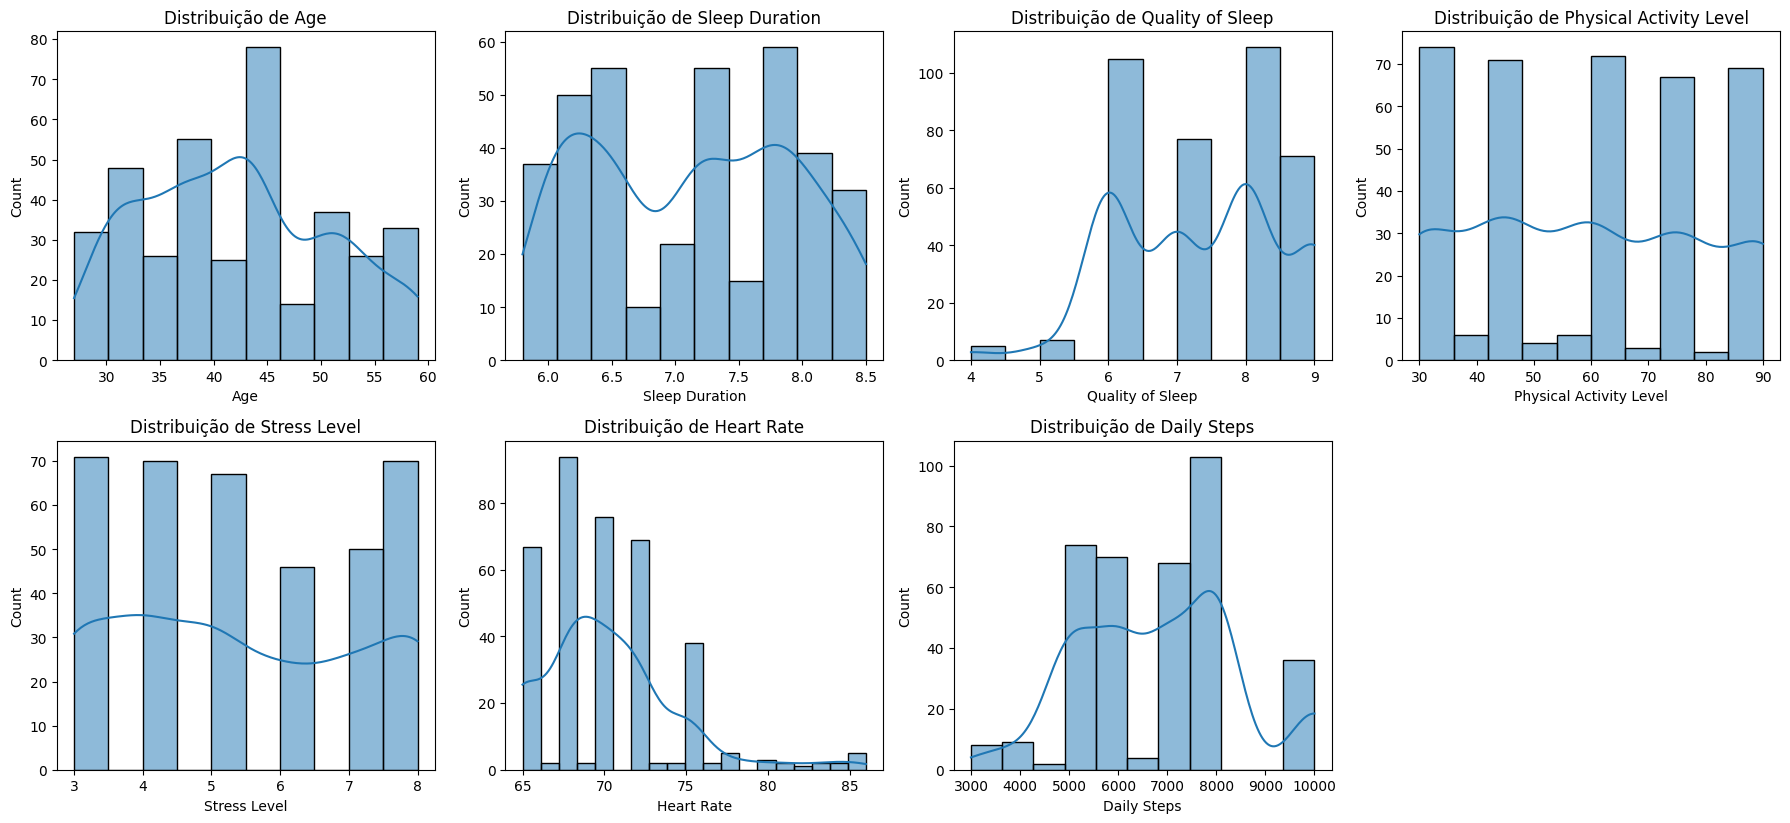

In [7]:
# plotar o histograma das variáveis numéricas
plt.figure(figsize=(18, 12))
for i, col in enumerate(column_names):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribuição de {col}')
plt.tight_layout()
plt.show()

# Data Cleaning

In [8]:
# Substituir zeros por NaN em colunas onde isso indica ausência de dados válidos
cols_with_zeros = ['Sleep Duration', 'Physical Activity Level', 'Heart Rate', 'Daily Steps']

# Substituindo zeros por NaN e contando os valores ausentes
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)
df.isnull().sum()

# Remover linhas com valores ausentes
df_clean = df.dropna(inplace=False)

df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


# Analisando a correlação dos dados

In [9]:
# Dataframe com dos dados nulos removidos
df_clean = df.dropna(inplace=False)

# Select only numerical features for correlation analysis
numerical_df = df_clean.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr = numerical_df.corr()

# Display the correlation matrix
corr

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Person ID,1.000000,0.981739,0.465877,0.661836,0.573090,-0.417244,-0.409011,0.447782
Age,0.981739,1.000000,0.550193,0.710221,0.604725,-0.452398,-0.373515,0.434277
Sleep Duration,0.465877,0.550193,1.000000,0.916748,0.240760,-0.848873,-0.337888,-0.194249
Quality of Sleep,0.661836,0.710221,0.916748,1.000000,0.352021,-0.872084,-0.534720,0.025166
Physical Activity Level,0.573090,0.604725,0.240760,0.352021,1.000000,-0.026627,0.101348,0.780685
Stress Level,-0.417244,-0.452398,-0.848873,-0.872084,-0.026627,1.000000,0.598860,0.285082
Heart Rate,-0.409011,-0.373515,-0.337888,-0.534720,0.101348,0.598860,1.000000,-0.133465
Daily Steps,0.447782,0.434277,-0.194249,0.025166,0.780685,0.285082,-0.133465,1.000000


# Regressão: Frequencia Cardíaca


In [10]:
# Definir X como todas as colunas numéricas, exceto Heart Rate e Person ID
XR = df_clean[column_names].drop(columns=['Heart Rate'])
yR = df_clean['Heart Rate']

# Padronização de dados de Regressão

In [11]:
# Padronização dos dados de Regressão
scaler = StandardScaler()
XR_scaled = scaler.fit_transform(XR)

In [12]:
print(XR_scaled)

[[-2.38447672 -1.18316045 -2.15375815 -1.50221421  1.15037174 -1.99480947]
 [-2.38447672 -1.18316045 -2.15375815 -1.50221421  1.15037174 -1.99480947]
 [-2.38447672 -1.18316045 -2.15375815 -1.50221421  1.15037174 -1.99480947]
 [-2.25650099 -0.66437723 -0.6533873  -1.01600999  0.6350318  -1.72995127]
 [-2.25650099 -0.40498561 -1.40357273 -1.01600999  0.6350318  -1.46509306]
 [-2.25650099 -1.05346464 -0.6533873  -1.50221421  1.15037174  0.65377258]
 [-2.25650099 -0.40498561 -1.40357273 -1.01600999  0.6350318  -1.46509306]
 [-2.12852527 -0.53468142 -1.40357273 -1.2591121   0.6350318  -1.41212142]
 [-2.12852527 -0.53468142 -1.40357273 -1.2591121   0.6350318  -1.41212142]
 [-2.00054954  1.15136406  0.09679812  0.68570479  0.11969186  0.65377258]
 [-1.7445981  -1.05346464 -0.6533873  -1.50221421  1.15037174 -0.93537665]
 [-1.61662237 -1.31285626 -2.15375815 -1.40497337  1.15037174 -0.82943337]
 [-1.61662237 -1.31285626 -2.15375815 -1.40497337  1.15037174 -0.82943337]
 [-1.48864665  0.76227664

# Separar treino e teste de Regressão


Utilizando o método Hold-out para separação dos dados em 70%
treino e 30% teste:

In [13]:
# Utilizando o método Hold-out para separação dos dados em 70% treino e 30% teste:
XR_train, XR_test, yR_train, yR_test = train_test_split(XR, yR, test_size=0.3, random_state=42)


In [14]:
def avaliar_modelo(yR_true, yR_pred, nome="Modelo"):
    rmse = np.sqrt(mean_squared_error(yR_true, yR_pred))
    print(f"{nome} - RMSE: {rmse:.2f}")

# Regressão Linear

In [16]:
modelo_lr = LinearRegression()
modelo_lr.fit(XR_train, yR_train)

pred_lr = modelo_lr.predict(XR_test)
avaliar_modelo(yR_test, pred_lr, "Regressão Linear")

Regressão Linear - RMSE: 1.98


# Árvore de Regressão

In [17]:
modelo_tree = DecisionTreeRegressor(random_state=42)
modelo_tree.fit(XR_train, yR_train)

pred_tree = modelo_tree.predict(XR_test)
avaliar_modelo(yR_test, pred_tree, "Árvore de Regressão")

Árvore de Regressão - RMSE: 0.44


# Random Forest Regressor

In [18]:
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(XR_train, yR_train)

pred_rf = modelo_rf.predict(XR_test)
avaliar_modelo(yR_test, pred_rf, "Random Forest")

Random Forest - RMSE: 1.20


# Support Vector Regressor (SVR)

In [19]:
modelo_svr = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=100, epsilon=0.1))
modelo_svr.fit(XR_train, yR_train)

pred_svr = modelo_svr.predict(XR_test)
avaliar_modelo(yR_test, pred_svr, "SVR")

SVR - RMSE: 0.55


# Comparando ...

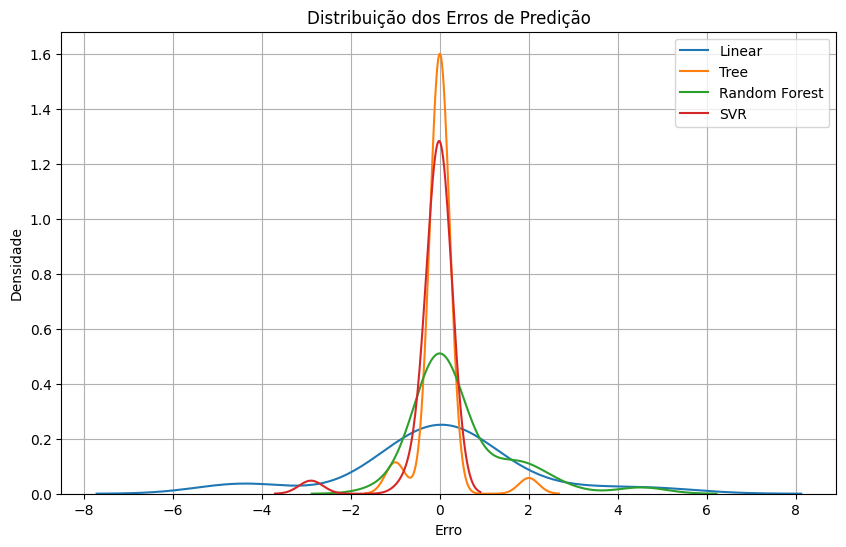

In [20]:
plt.figure(figsize=(10, 6))
sns.kdeplot(yR_test - pred_lr, label="Linear")
sns.kdeplot(yR_test - pred_tree, label="Tree")
sns.kdeplot(yR_test - pred_rf, label="Random Forest")
sns.kdeplot(yR_test - pred_svr, label="SVR")

plt.title("Distribuição dos Erros de Predição")
plt.xlabel("Erro")
plt.ylabel("Densidade")
plt.grid(True)
plt.legend()
plt.show()

##Conclusao:



O modelo que se saiu melhor na análise de Frequencia Cardiaca (Heart Rate) foi  a Árvore de Regressão (Tree) com seu RMSE de 0.44. E como visto no gráfico acima de Distribuição dos Erros de Predição, tem a curva qua mais se desta com o pico mais alto diante das outras obtendo uma Densidade (Eixo Y) muito elevada no ponto 0 (zero) e em questão de Erro (Eixo X), é a curva que menos dispersa para os lados. Isso indica que indica que esse modelo de machine learning é o que mais se destaca diante dos demais modelos nessa parte de avaliação de dados, porque tem a menor chance de errar.

Em seguda temos O modelo de SVR

Random Forest

Por fim, temos o modelo Linear que teve o pior desempenho entre os demais

# Classificação: Categoria de IMC (BMI Category):


In [139]:
# Definir X e y (X = variáveis preditoras, y = alvo)
XC = df_clean.select_dtypes(include=['number']).drop(columns=['Person ID']) #somente numeros
yC = df_clean['BMI Category']

# Padronização dos dados para Classificação

In [140]:
# Padronização dos dados para Classificação
scaler = StandardScaler()
XC_scaled = scaler.fit_transform(XC)

In [141]:
print(XC_scaled)

[[-2.38447672 -1.18316045 -2.15375815 ...  1.15037174  2.55538053
  -1.99480947]
 [-2.38447672 -1.18316045 -2.15375815 ...  1.15037174  2.55538053
  -1.99480947]
 [-2.38447672 -1.18316045 -2.15375815 ...  1.15037174  2.55538053
  -1.99480947]
 ...
 [ 1.58277073  1.67014728  1.59716896 ... -1.42632797 -0.73242596
   0.12405617]
 [ 1.58277073  1.67014728  1.59716896 ... -1.42632797 -0.73242596
   0.12405617]
 [ 1.58277073  1.67014728  1.59716896 ... -1.42632797 -0.73242596
   0.12405617]]


# Separar treino e teste

Utilizando o método Hold-out para separação dos dados em 70%
treino e 30% teste:

In [142]:
#utilizando o método Hold-out para separação dos dados em 70% treino e 30% teste:
XC_train, XC_test, yC_train, yC_test = train_test_split(
    XC_scaled, yC, test_size=0.3, random_state=42
)

# Algoritmos de Classificação

In [143]:
modelos = {
    "Regressão Logística": LogisticRegression(max_iter=200),
    "Árvore de Decisão": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf'),
    "K-NN": KNeighborsClassifier(n_neighbors=5)
}

# Avaliação por modelo


 Regressão Logística
Acurácia : 0.89
Precisão : 0.96
Recall   : 0.67
F1-Score : 0.72


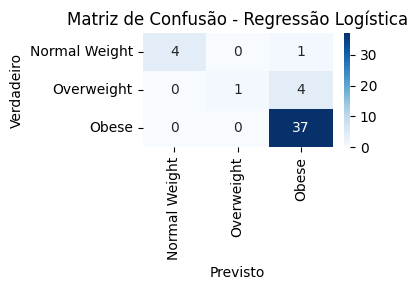


 Árvore de Decisão
Acurácia : 0.89
Precisão : 0.96
Recall   : 0.67
F1-Score : 0.72


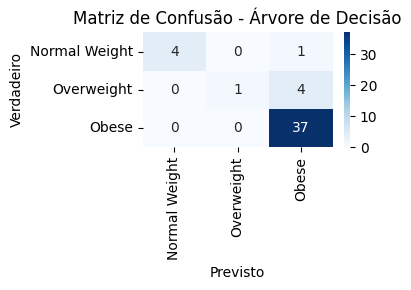


 Random Forest
Acurácia : 0.85
Precisão : 0.74
Recall   : 0.65
F1-Score : 0.68


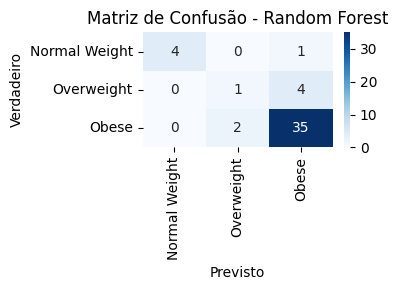


 SVM
Acurácia : 0.85
Precisão : 0.74
Recall   : 0.65
F1-Score : 0.68


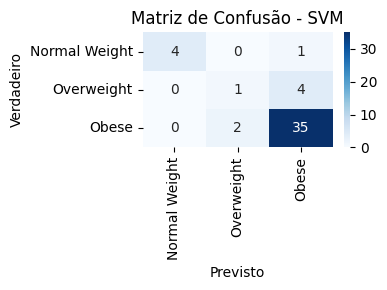


 K-NN
Acurácia : 0.81
Precisão : 0.46
Recall   : 0.43
F1-Score : 0.44


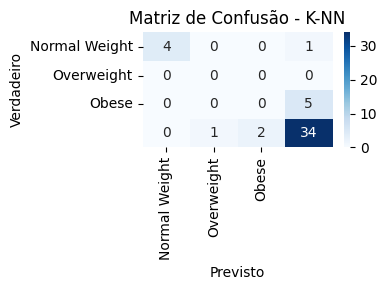

In [149]:
# Classificação de Categoria IMC através de: Peso Normal, Sobrepeso e Obeso
class_names={"Normal Weight": 0,"Overweight": 1,"Obese": 2}
for nome, modelo in modelos.items():
    modelo.fit(XC_train, yC_train)
    yC_pred = modelo.predict(XC_test)

    # Métricas
    acc = accuracy_score(yC_test, yC_pred)
    prec = precision_score(yC_test, yC_pred, average='macro', zero_division=0)
    rec = recall_score(yC_test, yC_pred, average='macro', zero_division=0)
    f1 = f1_score(yC_test, yC_pred, average='macro', zero_division=0)
    cm = confusion_matrix(yC_test, yC_pred)

    print(f"\n {nome}")
    print(f"Acurácia : {acc:.2f}")
    print(f"Precisão : {prec:.2f}")
    print(f"Recall   : {rec:.2f}")
    print(f"F1-Score : {f1:.2f}")

    # Matriz de confusão
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Matriz de Confusão - {nome}')
    plt.xlabel("Previsto")
    plt.ylabel("Verdadeiro")
    plt.tight_layout()
    plt.show()

##Conclusão


Através da Matriz de Confusão é possível observar que os modelos que mais tiveram destaque na previsão de dados foram Regressão Logística e Arvore de Decisão, ambas com valores identicos com Acurácia de 0.89, Precisão de 0.96, Recall de 0.67 e F1-Score de 0.72. Isso indica que nessas configurações eles tiveram maior desempenho que os demais e são mais recomendados para esse tipo de previsão.

Em seguida tivemos os modelos Random Forest e SVM com desempenho mediano com ambos tendo valores de Acurácia de 0.85, Precisão de 0.74, Recall de 0.65 e F1-Score de 0.68.

Por fim, Tivemos a performance de K-NN que teve o pior desempenho entre os demais, e visivelmente apresenta dificuldades em prever todas as classes, especialmente Overweight e isso reflete diretamente nos dados de sua Acurácia de 0.81, Precisão : 0.46, Recall   : 0.43 e F1-Score : 0.44 que foram igualmente baixos.

# Conclusão